In [3]:
import cv2

In [4]:
#can look at all the color space conversions OpenCV provides
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [5]:
len(flags)

274

In [6]:
import matplotlib.pyplot as plt
import numpy as np

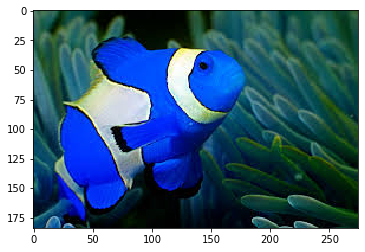

In [7]:
nemo = cv2.imread('C:\\Users\\LOHANI\\Desktop\\nemo0.jpg')
plt.imshow(nemo)
plt.show()

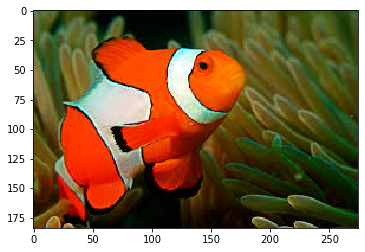

In [8]:
#OpenCV by default reads images in BGR format. You can use the cvtColor(image, flag)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [9]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [13]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

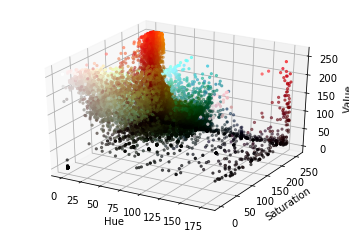

In [14]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [16]:
light_orange = (1, 190, 200)
>>> dark_orange = (18, 255, 255)

In [17]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [18]:
#To impose the mask on top of the original image
result = cv2.bitwise_and(nemo, nemo, mask=mask)

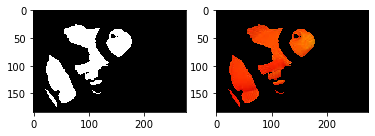

In [19]:
plt.subplot(1, 2, 1)
>>> plt.imshow(mask, cmap="gray")
>>> plt.subplot(1, 2, 2)
>>> plt.imshow(result)
>>> plt.show()

In [21]:
#adding a second mask
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

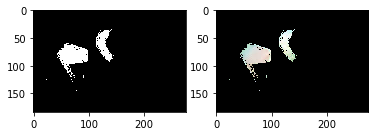

In [22]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
>>> result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

>>> plt.subplot(1, 2, 1)
>>> plt.imshow(mask_white, cmap="gray")
>>> plt.subplot(1, 2, 2)
>>> plt.imshow(result_white)
>>> plt.show()

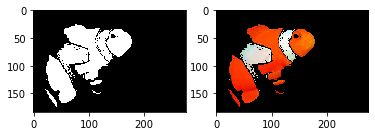

In [24]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()